# Stochastic Gradient Descent without Replacement

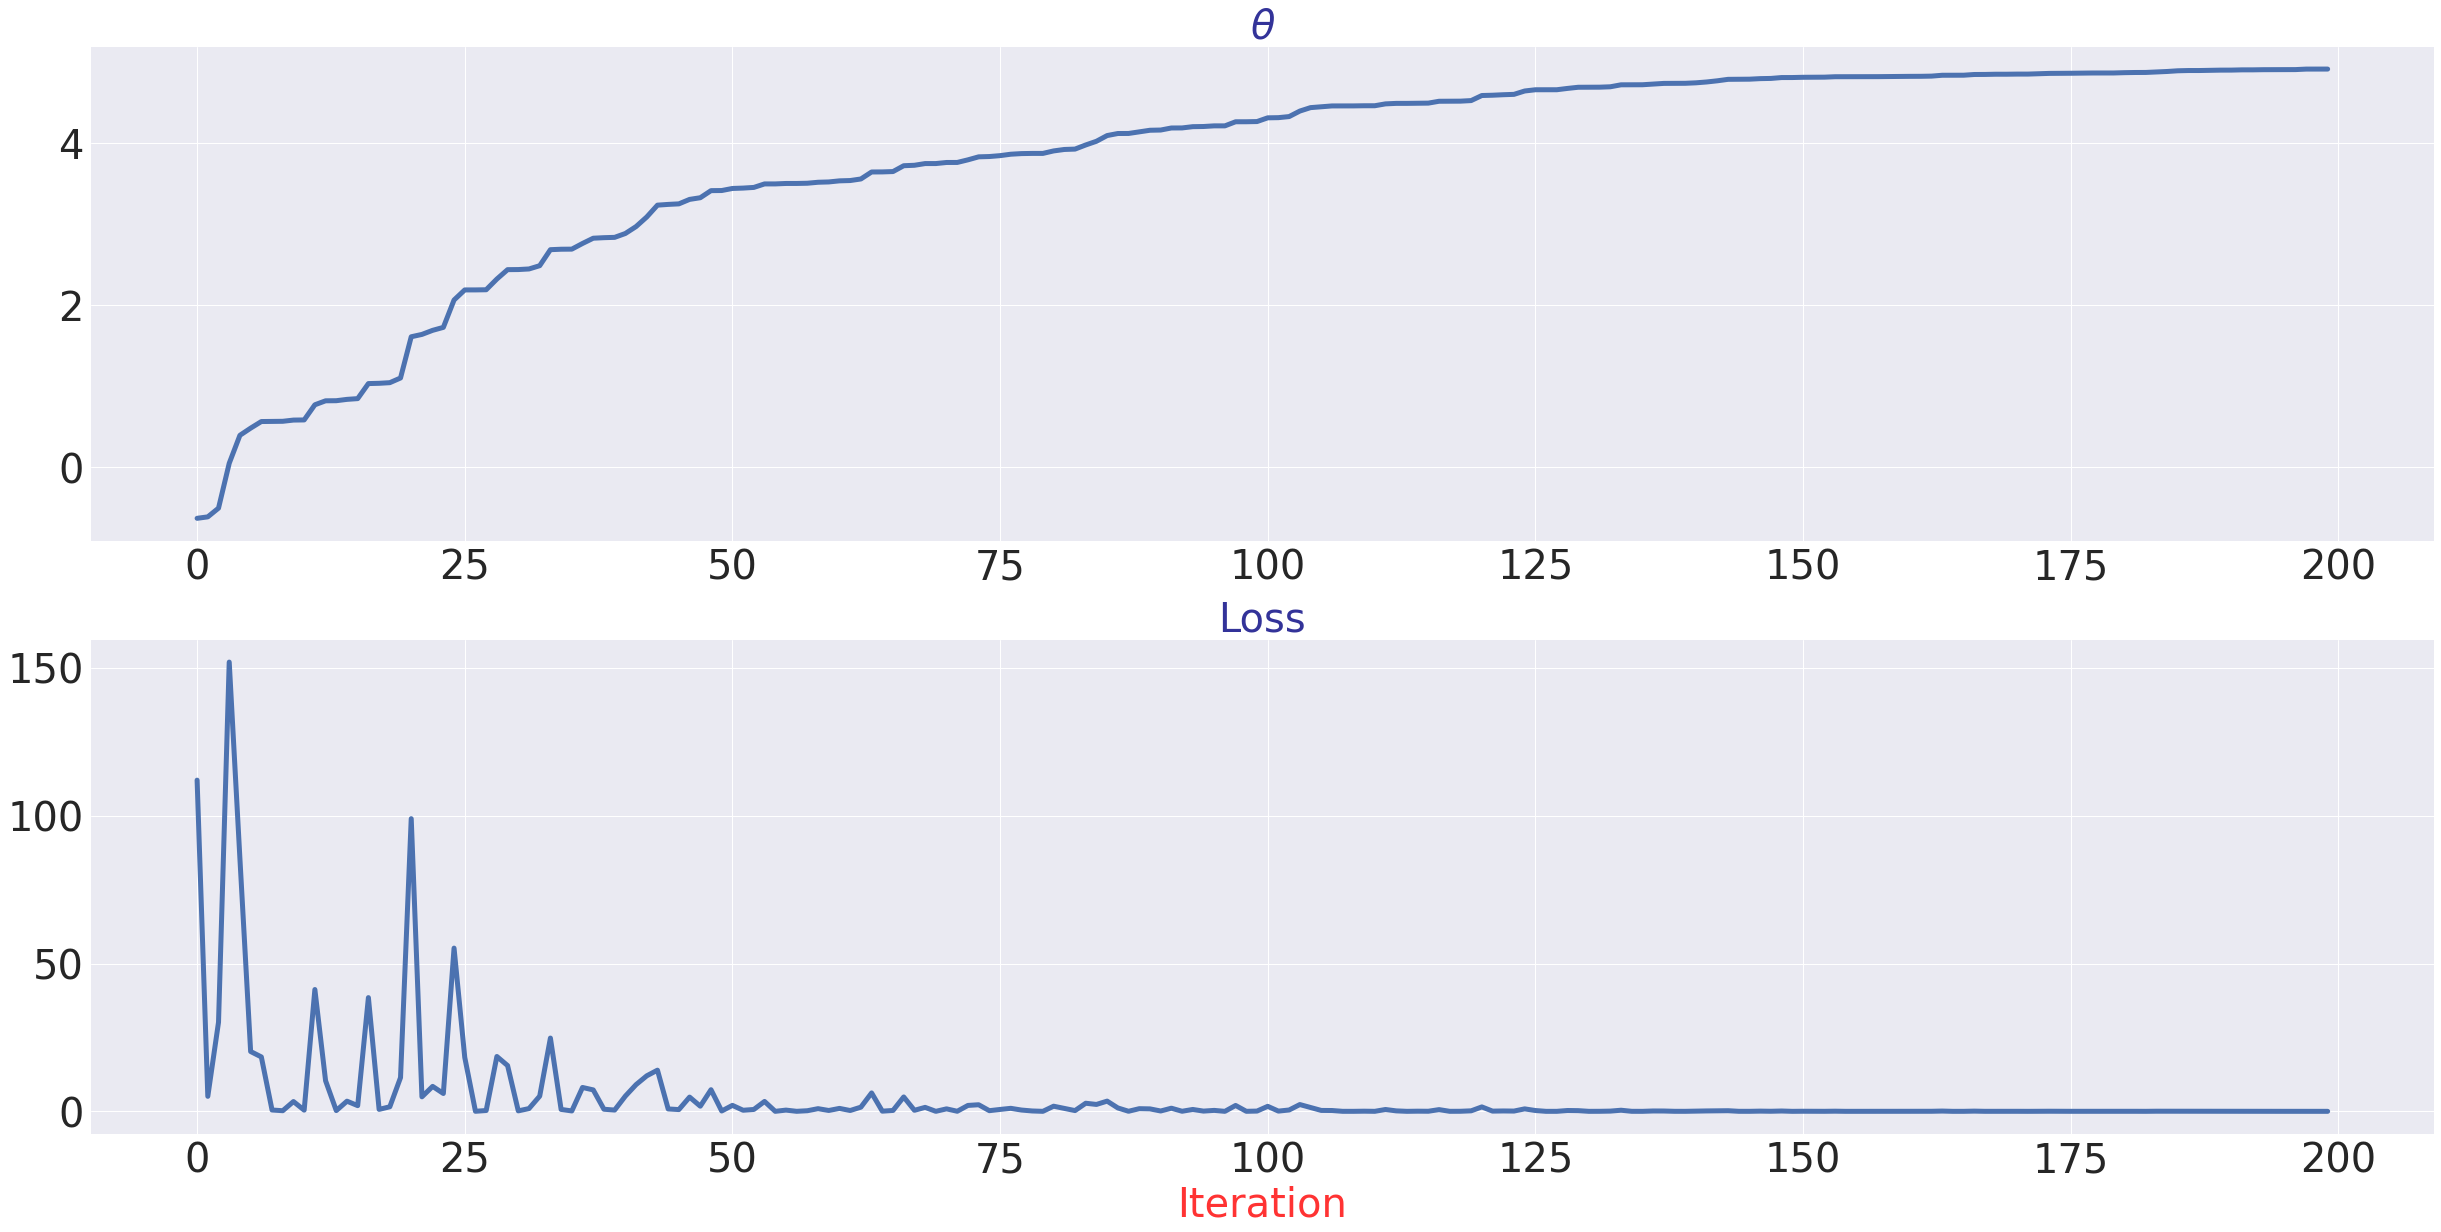

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class dataset_generator: 
    def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient = None
        self._init_set_coefficient()
        
    def _init_set_coefficient(self): 
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0] 
        
    def set_n_sample(self, n_sample): #사용자가 접근할 수 있는 method
        self._n_sample = n_sample #n_sample을 default인 100이 아닌 사용자가 지정한 값으로 지정해줌
        
    def set_noise(self, noise): #사용자가 접근할 수 있는 method
        self._noise = noise
        
    def set_coefficient(self, coefficient_list): #사용자가 접근할 수 있는 method
        self._coefficient = coefficient_list
        
    def make_dataset(self):
        x_data = np.random.normal(0,1, size = (self._n_sample, self._feature_dim))
        y_data = np.zeros(shape = (self._n_sample, 1))
        for feature_idx in range(self._feature_dim):
            y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
            y_data += self._coefficient[-1] #배열 맨 마지막인 bias를 더해줌
            y_data += self._noise * np.random.normal(0,1,size = (self._n_sample, 1))
        return x_data, y_data
    
    def dataset_visualizer(self):
        if self._feature_dim == 1:
            plt.style.use('seaborn')
            
            fig, ax = plt.subplots(figsize = (10,10))
            ax.plot(x_data, y_data, 'bo', alpha = 0.3, markersize = 20)
            ax.tick_params(axis = 'both', labelsize = 30)
            
            ax.set_title("DATASET", fontsize = 40, color = 'darkred')
            ax.set_xlabel("X Data", fontsize = 30, alpha = 0.6)
            ax.set_ylabel("Y Data", fontsize = 30, alpha = 0.6)
        else:
            class feature_dim_error(Exception):
                pass
            raise feature_dim_error("Visualization is valid for only feature_dim == 1.")

    
    
class plus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x + self._y
        return self._z
    
    def backward(self, dz):
        return dz, dz
    
class minus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x - self._y
        return self._z
    
    def backward(self, dz):
        return dz, -1*dz
    
class mul_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x * self._y
        return self._z
    
    def backward(self, dz):
        return dz*self._y, dz*self._x
    
class square_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = self._x * self._x
        return self._z
    
    def backward(self, dz):
        return dz*2*self._x
    
class mean_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = np.mean(self._x) 
        return self._z
    
    def backward(self, dz):
        dx = dz*1/len(self._x)*np.ones_like(self._x)
        return dx
    
np.random.seed(0)
plt.style.use('seaborn')

# Dataset Preparation
dataset_gen = dataset_generator()
dataset_gen.set_coefficient([5,0])
x_data, y_data = dataset_gen.make_dataset() # x, y data를 랜덤하게 생성

# model part
node1 = mul_node()

# square error loss part
node2 = minus_node()
node3 = square_node()

th = -1 # initial theta (target theta = 5)
lr = 0.01

# for tracking about loss, theta
loss_list, th_list = [], []
epochs = 2

for epoch in range(epochs):
    for data_idx in range(len(x_data)):
        x, y = x_data[data_idx], y_data[data_idx]
        
        z1 = node1.forward(th, x)
        z2 = node2.forward(y, z1)
        L = node3.forward(z2)
        
        dz2 = node3.backward(1)
        dy, dz1 = node2.backward(dz2)
        dth, dx = node1.backward(dz1)
        
        th = th - lr*dth
        
        th_list.append(th.item())
        loss_list.append(L.item())
        
fig, ax = plt.subplots(2, 1, figsize = (42,20))
ax[0].plot(th_list, linewidth = 5)
ax[1].plot(loss_list, linewidth = 5)
title_font = {'size':40, 'alpha':0.8, 'color' : 'navy'}
label_font = {'size':40, 'alpha':0.8}
        

ax[0].set_title(r'$\theta$', fontdict = title_font)
ax[1].set_title("Loss", fontdict = title_font)
ax[1].set_xlabel("Iteration", color = 'red', fontdict = label_font)
ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1].tick_params(axis='both', which='major', labelsize=40)



# Stochastic Gradient Descent without Replacement + Data Shuffling

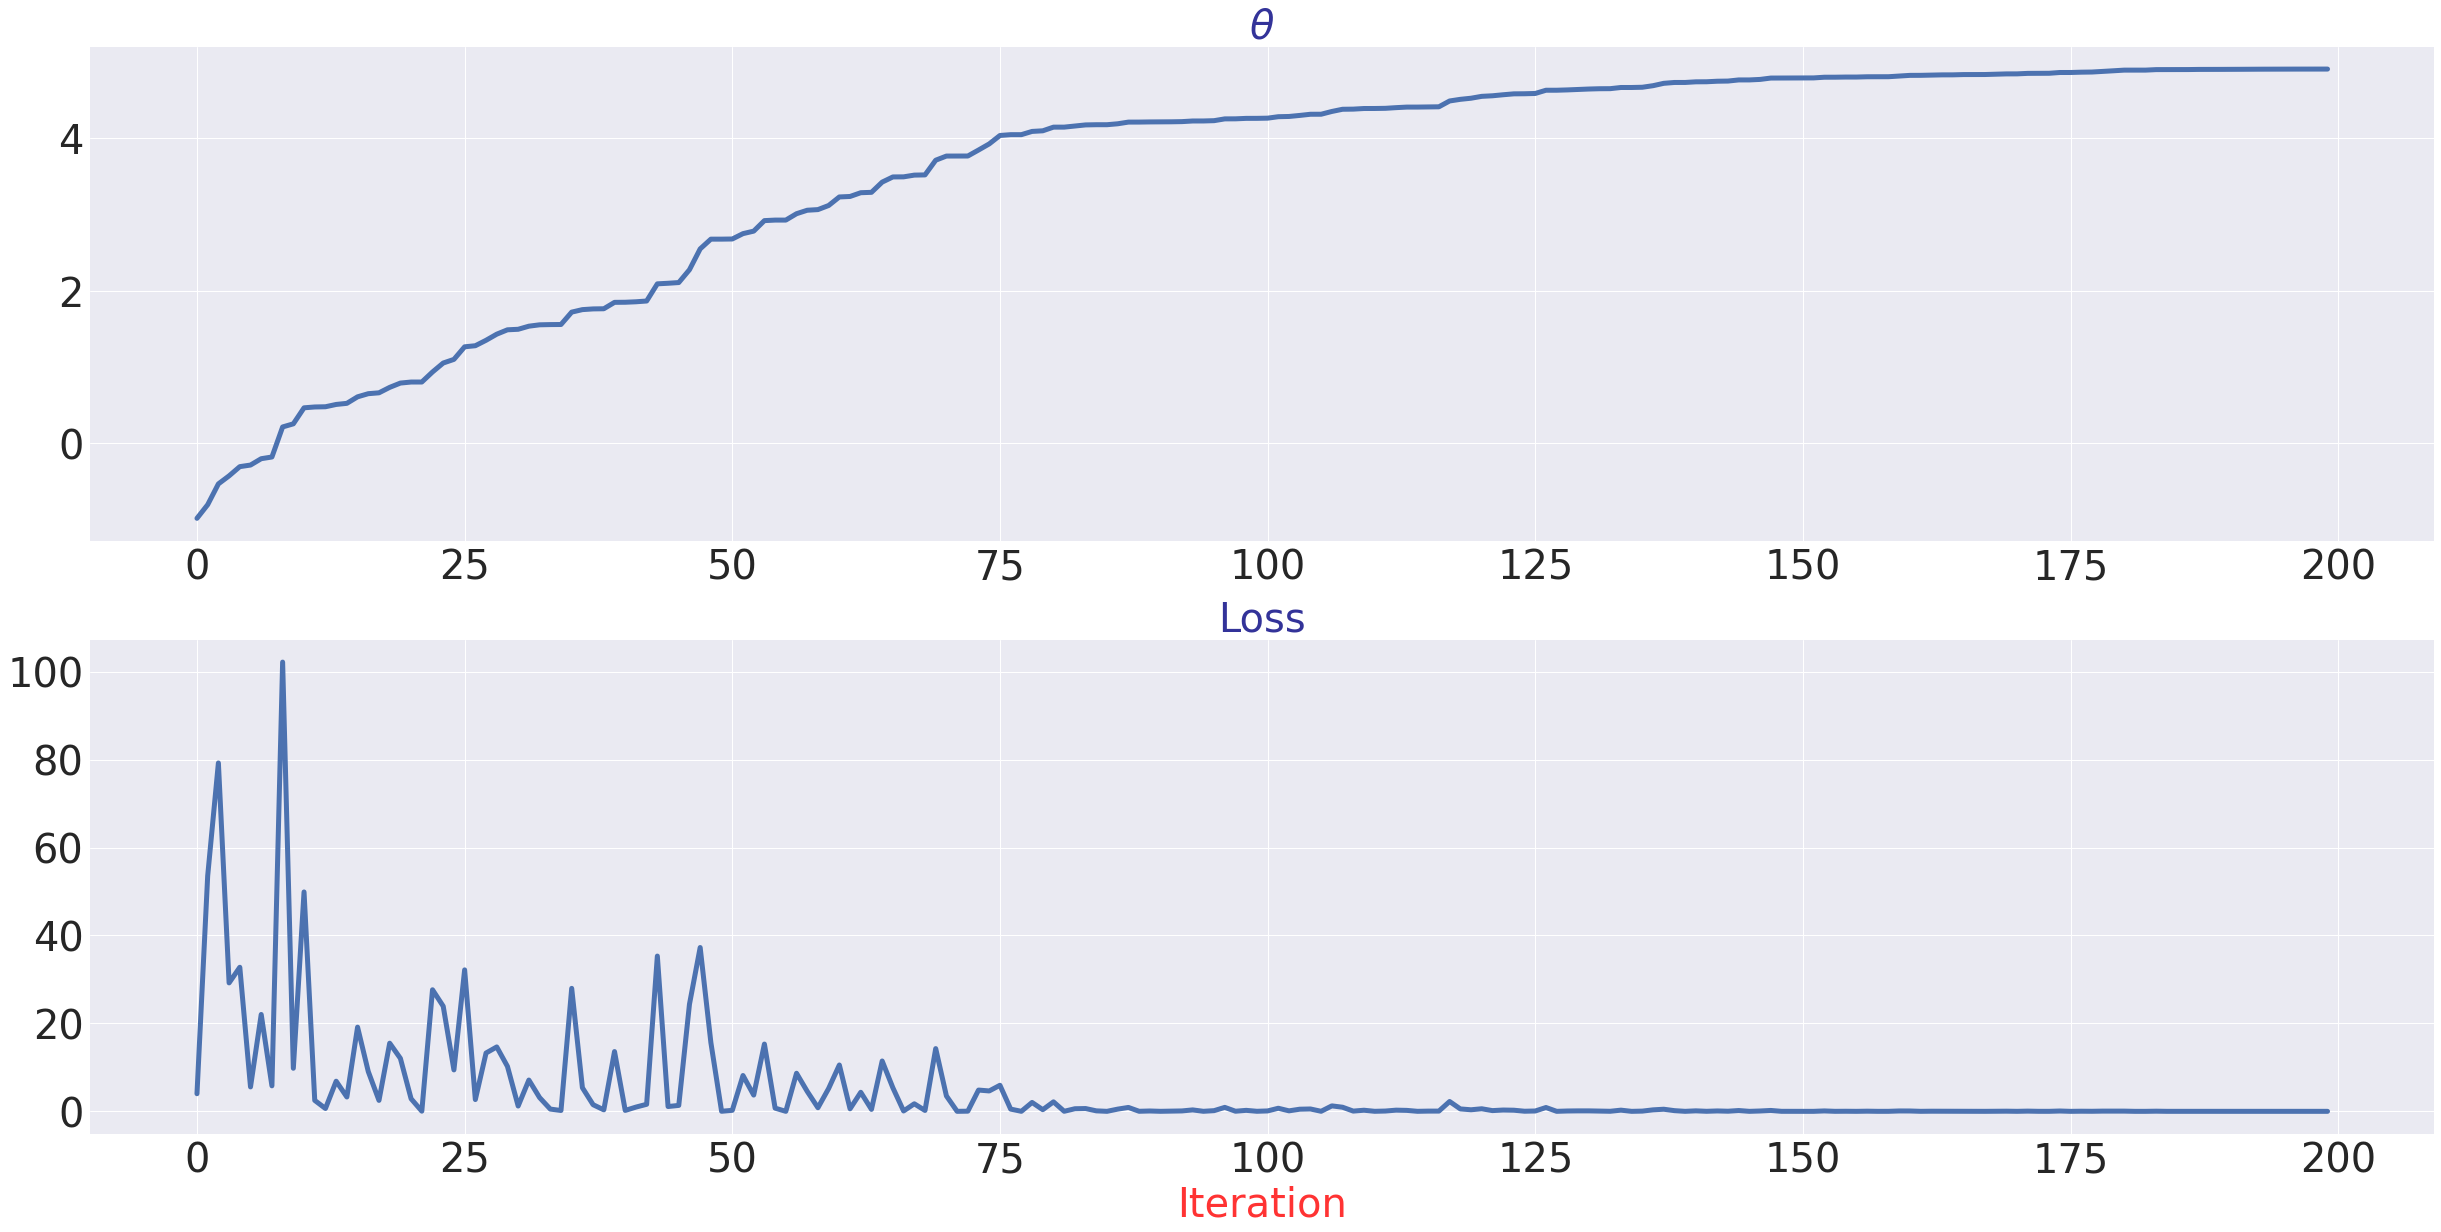

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class dataset_generator: 
    def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient = None
        self._init_set_coefficient()
        
    def _init_set_coefficient(self): 
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0] 
        
    def set_n_sample(self, n_sample): #사용자가 접근할 수 있는 method
        self._n_sample = n_sample #n_sample을 default인 100이 아닌 사용자가 지정한 값으로 지정해줌
        
    def set_noise(self, noise): #사용자가 접근할 수 있는 method
        self._noise = noise
        
    def set_coefficient(self, coefficient_list): #사용자가 접근할 수 있는 method
        self._coefficient = coefficient_list
        
    def make_dataset(self):
        x_data = np.random.normal(0,1, size = (self._n_sample, self._feature_dim))
        y_data = np.zeros(shape = (self._n_sample, 1))
        for feature_idx in range(self._feature_dim):
            y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
            y_data += self._coefficient[-1] #배열 맨 마지막인 bias를 더해줌
            y_data += self._noise * np.random.normal(0,1,size = (self._n_sample, 1))
        return x_data, y_data
    
    def dataset_visualizer(self):
        if self._feature_dim == 1:
            plt.style.use('seaborn')
            
            fig, ax = plt.subplots(figsize = (10,10))
            ax.plot(x_data, y_data, 'bo', alpha = 0.3, markersize = 20)
            ax.tick_params(axis = 'both', labelsize = 30)
            
            ax.set_title("DATASET", fontsize = 40, color = 'darkred')
            ax.set_xlabel("X Data", fontsize = 30, alpha = 0.6)
            ax.set_ylabel("Y Data", fontsize = 30, alpha = 0.6)
        else:
            class feature_dim_error(Exception):
                pass
            raise feature_dim_error("Visualization is valid for only feature_dim == 1.")

    
    
class plus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x + self._y
        return self._z
    
    def backward(self, dz):
        return dz, dz
    
class minus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x - self._y
        return self._z
    
    def backward(self, dz):
        return dz, -1*dz
    
class mul_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x * self._y
        return self._z
    
    def backward(self, dz):
        return dz*self._y, dz*self._x
    
class square_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = self._x * self._x
        return self._z
    
    def backward(self, dz):
        return dz*2*self._x
    
class mean_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = np.mean(self._x) 
        return self._z
    
    def backward(self, dz):
        dx = dz*1/len(self._x)*np.ones_like(self._x)
        return dx
    
np.random.seed(0)
plt.style.use('seaborn')

# Dataset Preparation
dataset_gen = dataset_generator()
dataset_gen.set_coefficient([5,0])
x_data, y_data = dataset_gen.make_dataset() # x, y data를 랜덤하게 생성

# model part
node1 = mul_node()

# square error loss part
node2 = minus_node()
node3 = square_node()

th = -1 # initial theta (target theta = 5)
lr = 0.01

# for tracking about loss, theta
loss_list, th_list = [], []
epochs = 2

for epoch in range(epochs):
    
    # Data Shuffling
    random_idx = np.arange(len(x_data))
    np.random.shuffle(random_idx)
    x_data = x_data[random_idx]
    y_data = y_data[random_idx]
    
    for data_idx in range(len(x_data)):
        x, y = x_data[data_idx], y_data[data_idx]
        
        z1 = node1.forward(th, x)
        z2 = node2.forward(y, z1)
        L = node3.forward(z2)
        
        dz2 = node3.backward(1)
        dy, dz1 = node2.backward(dz2)
        dth, dx = node1.backward(dz1)
        
        th = th - lr*dth
        
        th_list.append(th.item())
        loss_list.append(L.item())
        
fig, ax = plt.subplots(2, 1, figsize = (42,20))
ax[0].plot(th_list, linewidth = 5)
ax[1].plot(loss_list, linewidth = 5)
title_font = {'size':40, 'alpha':0.8, 'color' : 'navy'}
label_font = {'size':40, 'alpha':0.8}
        

ax[0].set_title(r'$\theta$', fontdict = title_font)
ax[1].set_title("Loss", fontdict = title_font)
ax[1].set_xlabel("Iteration", color = 'red', fontdict = label_font)
ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1].tick_params(axis='both', which='major', labelsize=40)



# Stochastic Gradient Descent with Replacement

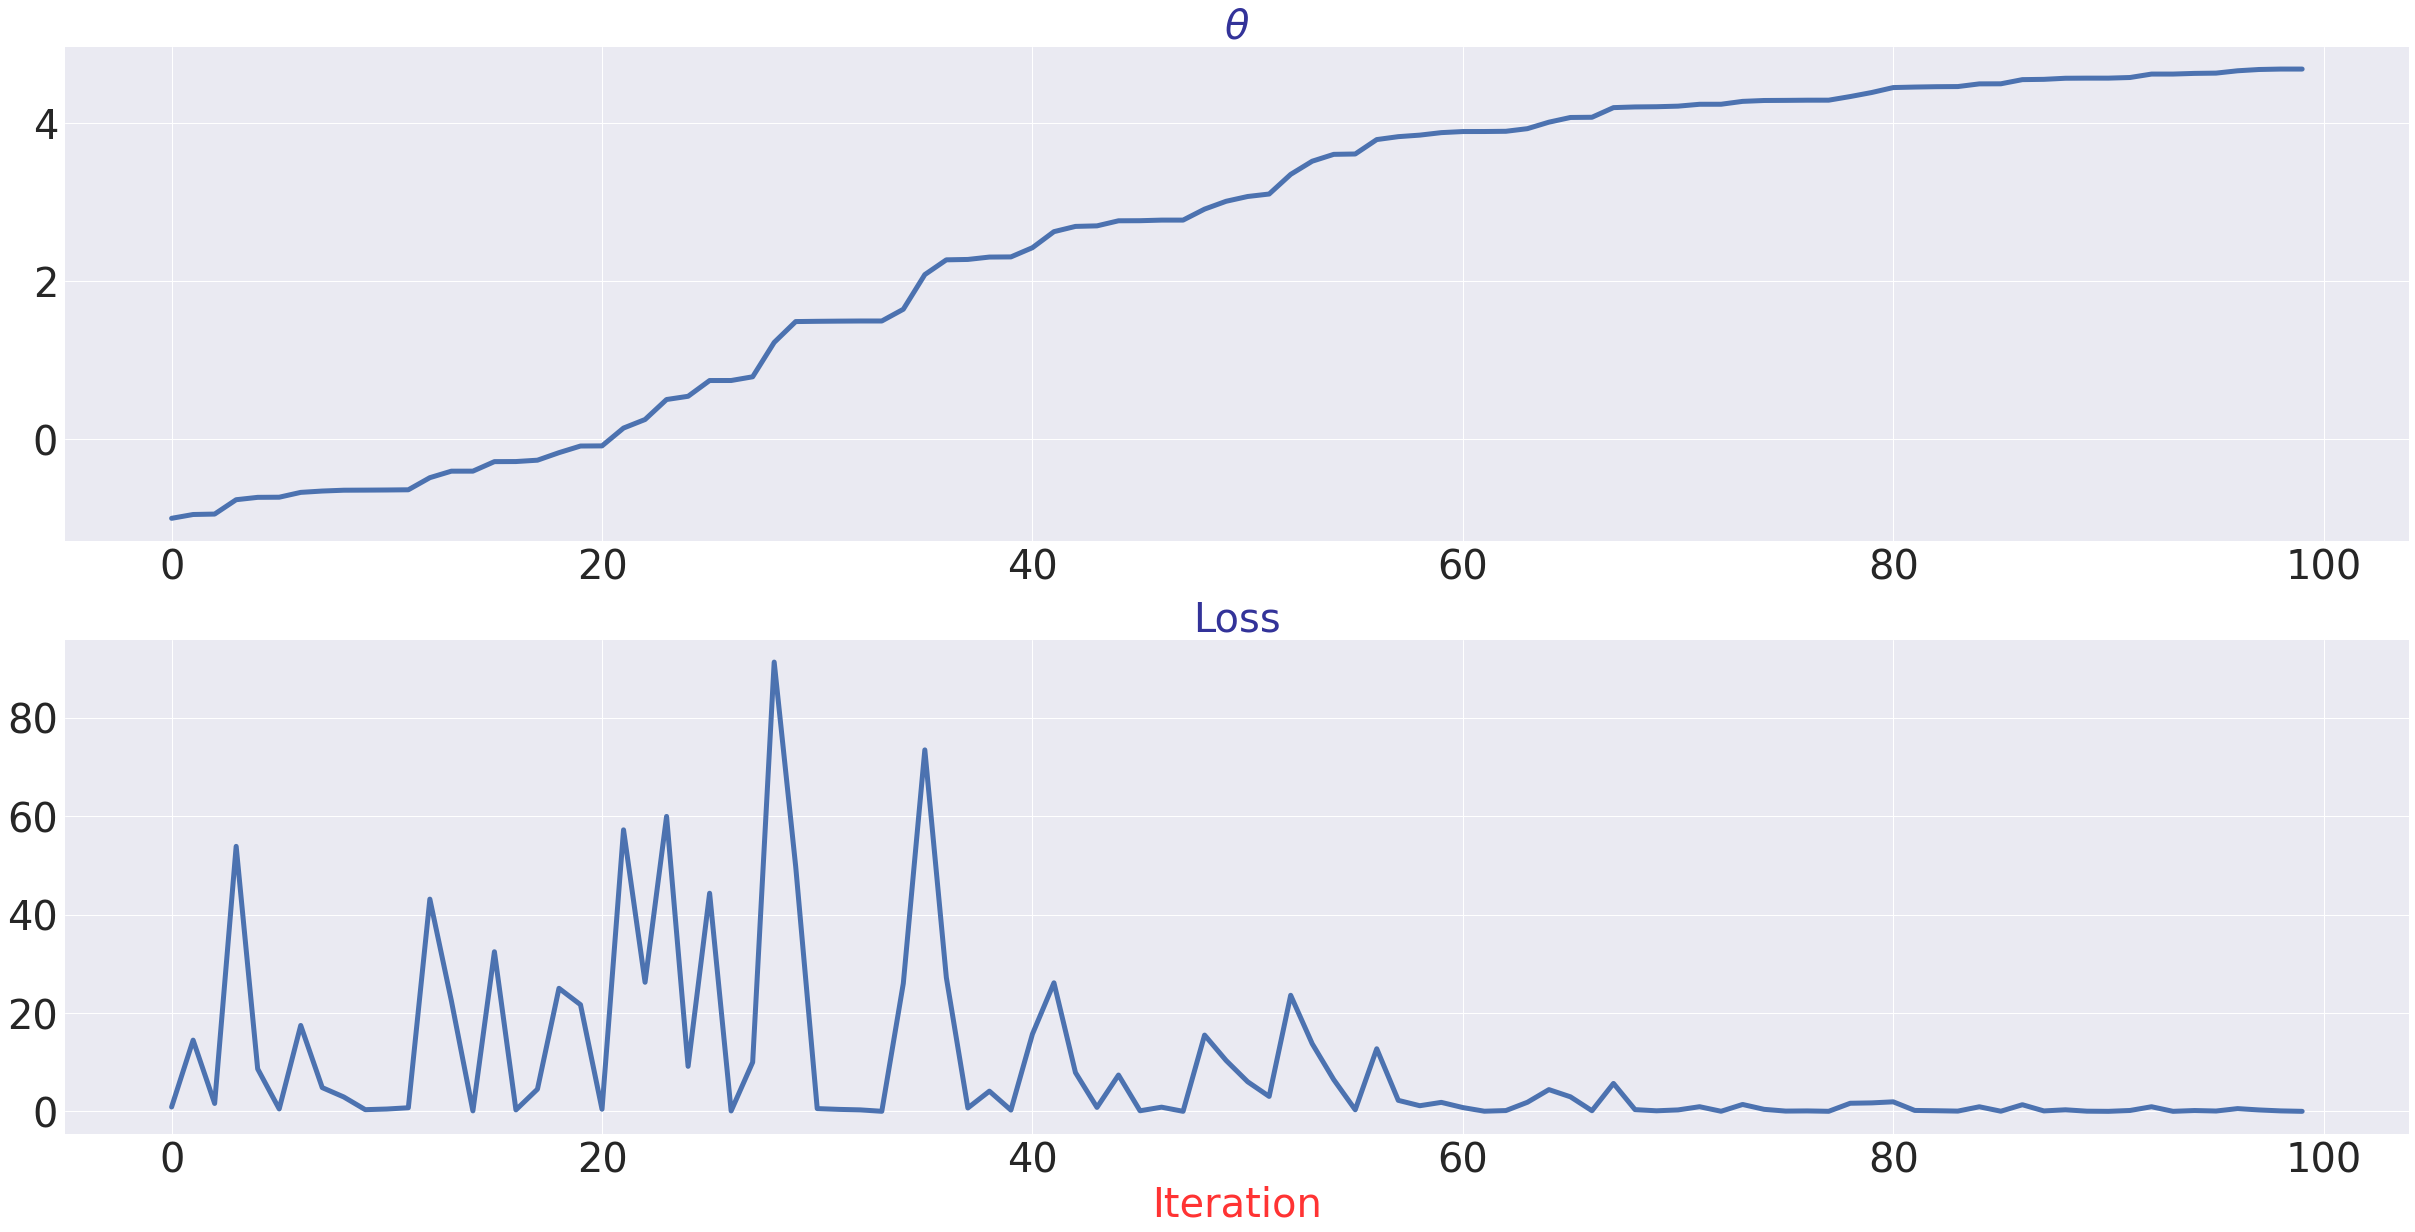

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class dataset_generator: 
    def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient = None
        self._init_set_coefficient()
        
    def _init_set_coefficient(self): 
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0] 
        
    def set_n_sample(self, n_sample): #사용자가 접근할 수 있는 method
        self._n_sample = n_sample #n_sample을 default인 100이 아닌 사용자가 지정한 값으로 지정해줌
        
    def set_noise(self, noise): #사용자가 접근할 수 있는 method
        self._noise = noise
        
    def set_coefficient(self, coefficient_list): #사용자가 접근할 수 있는 method
        self._coefficient = coefficient_list
        
    def make_dataset(self):
        x_data = np.random.normal(0,1, size = (self._n_sample, self._feature_dim))
        y_data = np.zeros(shape = (self._n_sample, 1))
        for feature_idx in range(self._feature_dim):
            y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
            y_data += self._coefficient[-1] #배열 맨 마지막인 bias를 더해줌
            y_data += self._noise * np.random.normal(0,1,size = (self._n_sample, 1))
        return x_data, y_data
    
    def dataset_visualizer(self):
        if self._feature_dim == 1:
            plt.style.use('seaborn')
            
            fig, ax = plt.subplots(figsize = (10,10))
            ax.plot(x_data, y_data, 'bo', alpha = 0.3, markersize = 20)
            ax.tick_params(axis = 'both', labelsize = 30)
            
            ax.set_title("DATASET", fontsize = 40, color = 'darkred')
            ax.set_xlabel("X Data", fontsize = 30, alpha = 0.6)
            ax.set_ylabel("Y Data", fontsize = 30, alpha = 0.6)
        else:
            class feature_dim_error(Exception):
                pass
            raise feature_dim_error("Visualization is valid for only feature_dim == 1.")

    
    
class plus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x + self._y
        return self._z
    
    def backward(self, dz):
        return dz, dz
    
class minus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x - self._y
        return self._z
    
    def backward(self, dz):
        return dz, -1*dz
    
class mul_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x * self._y
        return self._z
    
    def backward(self, dz):
        return dz*self._y, dz*self._x
    
class square_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = self._x * self._x
        return self._z
    
    def backward(self, dz):
        return dz*2*self._x
    
class mean_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = np.mean(self._x) 
        return self._z
    
    def backward(self, dz):
        dx = dz*1/len(self._x)*np.ones_like(self._x)
        return dx
    
np.random.seed(0)
plt.style.use('seaborn')

# Dataset Preparation
dataset_gen = dataset_generator()
dataset_gen.set_coefficient([5,0])
x_data, y_data = dataset_gen.make_dataset() # x, y data를 랜덤하게 생성

# model part
node1 = mul_node()

# square error loss part
node2 = minus_node()
node3 = square_node()

th = -1 # initial theta (target theta = 5)
lr = 0.01

# for tracking about loss, theta
loss_list, th_list = [], []
iterations = 200

    
for data_idx in range(len(x_data)):

    idx_arr = np.arange(len(x_data))
    random_idx = np.random.choice(idx_arr, 1)
    
    x, y = x_data[random_idx], y_data[random_idx]
        
    z1 = node1.forward(th, x)
    z2 = node2.forward(y, z1)
    L = node3.forward(z2)
        
    dz2 = node3.backward(1)
    dy, dz1 = node2.backward(dz2)
    dth, dx = node1.backward(dz1)
        
    th = th - lr*dth
        
    th_list.append(th.item())
    loss_list.append(L.item())
        
fig, ax = plt.subplots(2, 1, figsize = (42,20))
ax[0].plot(th_list, linewidth = 5)
ax[1].plot(loss_list, linewidth = 5)
title_font = {'size':40, 'alpha':0.8, 'color' : 'navy'}
label_font = {'size':40, 'alpha':0.8}
        

ax[0].set_title(r'$\theta$', fontdict = title_font)
ax[1].set_title("Loss", fontdict = title_font)
ax[1].set_xlabel("Iteration", color = 'red', fontdict = label_font)
ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1].tick_params(axis='both', which='major', labelsize=40)
  